# DS51 — Regional Growth Analysis

**Member Assigned:** BERNABE, Rabelais
**Task Name:** Regional Growth Analysis

## Task Description
Measure economic growth trends per region by computing year-over-year (YoY) growth rates and compound annual growth rate (CAGR). Focus on constant-price GRDP to remove inflation effects and identify which regions are expanding faster over time.

## Expected Outputs
- Table of YoY growth rates per region
- CAGR summary table
- Identification of fast-growing and slow-growing regions
- Trend visualization (line chart of GRDP over time)
- Interpretation of regional growth patterns

## Dataset: REGIONAL ECONOMIC MAGNITUDE (Regional Level)


In [39]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Define base directories
BASE_DIR = Path.cwd()
CLEAN_DIR = BASE_DIR / "../../03_Cleaned_Data"
OUT_TABLES = BASE_DIR / "outputs" / "tables"
OUT_FIGS = BASE_DIR / "outputs" / "figures"

OUT_TABLES.mkdir(parents=True, exist_ok=True)
OUT_FIGS.mkdir(parents=True, exist_ok=True)

print(f"BASE_DIR: {BASE_DIR}")
print(f"CLEAN_DIR exists: {CLEAN_DIR.exists()}")
print(f"OUT_TABLES: {OUT_TABLES}")
print(f"OUT_FIGS: {OUT_FIGS}")

# Load dataset
df = pd.read_csv(CLEAN_DIR / "Dataset 2 Sector_Economic_Structure (CLEANED).csv")

# Filter constant-price GRDP
df_constant = df[df['Price_Type'] == 'At Constant 2018 Prices'].copy()

# Pivot table: rows = Year, columns = Main_Sector, values = Total_GRDP
df_pivot = df_constant.pivot(index='Year', columns='Main_Sector', values='Total_GRDP')
df_pivot = df_pivot.sort_index()

BASE_DIR: C:\Users\PC\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\04_Analysis\DS51_Regional_Growth
CLEAN_DIR exists: True
OUT_TABLES: C:\Users\PC\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\04_Analysis\DS51_Regional_Growth\outputs\tables
OUT_FIGS: C:\Users\PC\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\04_Analysis\DS51_Regional_Growth\outputs\figures


In [40]:
# Year-over-Year (YoY) Growth Rates
df_yoy = df_pivot.pct_change() * 100
df_yoy = df_yoy.round(2)
print("Year-over-Year (YoY) Growth Rates (%):")
print(df_yoy)

# Save YoY table to CSV in OUT_TABLES
yoy_file = OUT_TABLES / "DS51_region_economic_structure_YoY_growth_rates.csv"
df_yoy.to_csv(yoy_file)
print(f"\nYoY Growth Rates saved as CSV at: {yoy_file}")

Year-over-Year (YoY) Growth Rates (%):
Main_Sector  Agriculture, forestry, and fishing  Industry  Services
Year                                                               
2000                                        NaN       NaN       NaN
2001                                       3.75      1.48      3.78
2002                                       3.76      3.72      3.70
2003                                       4.66      5.08      5.41
2004                                       5.00      4.53      9.09
2005                                       3.53      5.28      5.49
2006                                       4.56      3.83      6.78
2007                                       5.13      4.98      8.02
2008                                       3.40      5.65      4.73
2009                                      -0.13     -1.43      4.26
2010                                       1.28     10.02      8.14
2011                                       3.38      1.86      5.60
2012     

In [44]:
# Compound Annual Growth Rate (CAGR)
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

cagr_dict = {}
for sector in df_pivot.columns:
    start = df_pivot[sector].iloc[0]
    end = df_pivot[sector].iloc[-1]
    periods = df_pivot.shape[0] - 1
    cagr_dict[sector] = round(calculate_cagr(start, end, periods), 2)

df_cagr = pd.DataFrame.from_dict(cagr_dict, orient='index', columns=['CAGR (%)'])
print("\nCompound Annual Growth Rate (CAGR) Summary:")
print(df_cagr)

# Save CAGR summary to CSV in OUT_TABLES
cagr_file = OUT_TABLES / "DS51_region_economic_structure_CAGR_summary.csv"
df_cagr.to_csv(cagr_file)
print(f"\nCAGR Summary saved as CSV at: {cagr_file}")


Compound Annual Growth Rate (CAGR) Summary:
                                    CAGR (%)
Agriculture, forestry, and fishing      2.03
Industry                                4.60
Services                                5.86

 CAGR Summary saved as CSV at: C:\Users\PC\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\04_Analysis\DS51_Regional_Growth\outputs\tables\DS51_region_economic_structure_CAGR_summary.csv


In [42]:
# Identify fast- and slow-growing sectors
fast_growing = df_cagr.sort_values(by='CAGR (%)', ascending=False).head(3)
slow_growing = df_cagr.sort_values(by='CAGR (%)', ascending=True).head(3)
print("\n Fast-Growing Sectors:")
print(fast_growing)
print("\n Slow-Growing Sectors:")
print(slow_growing)


 Fast-Growing Sectors:
                                    CAGR (%)
Services                                5.86
Industry                                4.60
Agriculture, forestry, and fishing      2.03

 Slow-Growing Sectors:
                                    CAGR (%)
Agriculture, forestry, and fishing      2.03
Industry                                4.60
Services                                5.86


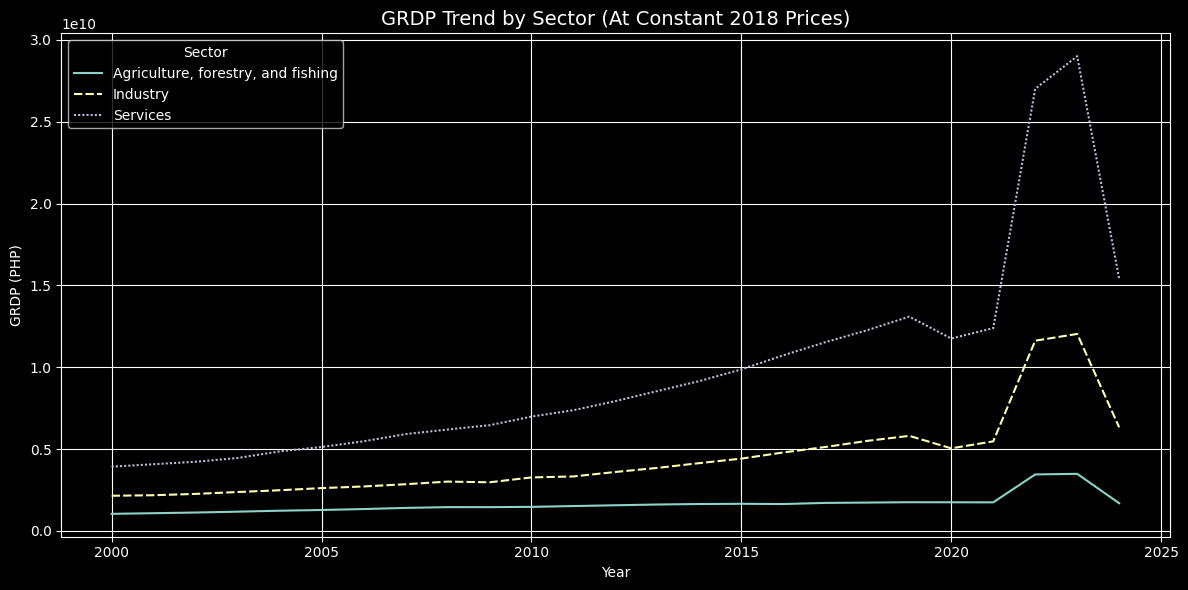


 GRDP trend figure saved at: C:\Users\PC\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\04_Analysis\DS51_Regional_Growth\outputs\figures\DS51_region_economic_structure_GRDP_trend_sector.png


In [43]:
# Visualize GRDP trends
plt.figure(figsize=(12,6))
sns.lineplot(data=df_pivot)
plt.title('GRDP Trend by Sector (At Constant 2018 Prices)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('GRDP (PHP)')
plt.grid(True)
plt.legend(title='Sector')
plt.tight_layout()

# Save figure in OUT_FIGS
fig_file = OUT_FIGS / "DS51_region_economic_structure_GRDP_trend_sector.png"
plt.savefig(fig_file, dpi=300)
plt.show()
print(f"\n GRDP trend figure saved at: {fig_file}")